In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

In [2]:
data_subset = pd.read_csv('r32_emimtf2n_subset.csv')

In [3]:
values = np.zeros(len(data_subset))

In [4]:
#Top 6 best = 1
values[2] = 1
values[5] = 1
values[12] = 1
values[19] = 1
values[23] = 1
values[26] = 1

#Top 7 best = 2
values[16] = 2

#Top 8 best = 3
values[3] = 3

In [5]:
values

array([0., 0., 1., 3., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 2.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1.])

In [6]:
data_subset['value'] = values

In [7]:
data_subset_top6 = data_subset.loc[data_subset['value']==1.0].reset_index(drop=True)
data_subset_top7 = data_subset.loc[data_subset['value']==2.0].reset_index(drop=True)
data_subset_top8 = data_subset.loc[data_subset['value']==3.0].reset_index(drop=True)
data_subset_rest = data_subset.loc[data_subset['value']==0.0].reset_index(drop=True)

In [8]:
data_subset_rest

,temperature,pressure,x_R32,x_emimTf2N,value
0,283.15,100100,0.136,0.864,0.0
1,283.15,250300,0.306,0.694,0.0
2,283.15,700400,0.672,0.328,0.0
3,298.15,99800,0.095,0.905,0.0
4,298.15,250200,0.218,0.782,0.0
5,298.15,399400,0.325,0.675,0.0
6,298.15,549400,0.417,0.583,0.0
7,298.15,699500,0.499,0.501,0.0
8,298.15,849500,0.570,0.430,0.0
9,323.15,100300,0.055,0.945,0.0


In [9]:
data_subset_top8

,temperature,pressure,x_R32,x_emimTf2N,value
0,283.15,549300,0.57,0.43,3.0


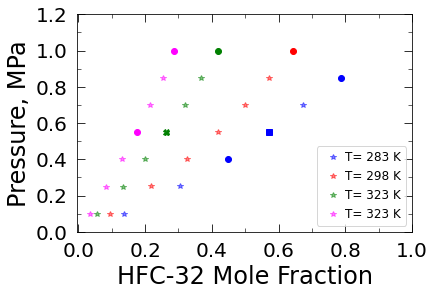

In [10]:
fig, ax = plt.subplots()

ax.plot(data_subset_rest["x_R32"][:3],data_subset_rest["pressure"][:3]/1e6,"*",color='blue',alpha=0.5,label="T= 283 K")
ax.plot(data_subset_rest["x_R32"][3:9],data_subset_rest["pressure"][3:9]/1e6,"*",color='red',alpha=0.5,label="T= 298 K")
ax.plot(data_subset_rest["x_R32"][9:14],data_subset_rest["pressure"][9:14]/1e6,"*",color='green',alpha=0.5,label="T= 323 K")
ax.plot(data_subset_rest["x_R32"][14:],data_subset_rest["pressure"][14:]/1e6,"*",color='magenta',alpha=0.5,label="T= 323 K")

ax.plot(data_subset_top6["x_R32"][:2],data_subset_top6["pressure"][:2]/1e6,"o",color='blue')
ax.plot(data_subset_top6["x_R32"][2],data_subset_top6["pressure"][2]/1e6,"o",color='red')
ax.plot(data_subset_top6["x_R32"][3],data_subset_top6["pressure"][3]/1e6,"o",color='green')
ax.plot(data_subset_top6["x_R32"][4:],data_subset_top6["pressure"][4:]/1e6,"o",color='magenta')

ax.plot(data_subset_top7["x_R32"][0],data_subset_top7["pressure"][0]/1e6,"X",color='green')

ax.plot(data_subset_top8["x_R32"][0],data_subset_top8["pressure"][0]/1e6,"s",color='blue')

# plt.title('Isotherm R32-[emim][TF2N]')
ax.set_ylabel('Pressure, MPa',fontsize=24)
ax.set_xlabel('HFC-32 Mole Fraction',fontsize=24)

ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticks([0.1, 0.3, 0.5, 0.7, 0.9],minor=True)
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2])
ax.set_yticks([0.1, 0.3, 0.5, 0.7, 0.9, 1.1],minor=True)

ax.tick_params("both", direction="in", which="both", length=4, labelsize=20, pad=10)
ax.tick_params("both", which="major", length=8)
ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")

ax.legend(fontsize=12, handletextpad=0.00, loc="lower right")#, bbox_to_anchor=(1, 0.5))
fig.savefig('R32-emimTF2N-data-info.pdf',bbox_inches='tight')
plt.show()